In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
Loan_Train=pd.read_csv("Loan Status/loan_status_train.csv")
Loan_Test=pd.read_csv("Loan Status/loan_status_test.csv")

In [3]:
#Loan_Train=pd.get_dummies(Loan_Train,drop_first=True)

In [4]:
Loan_Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
Loan_Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
Loan_Train=Loan_Train.drop(['Loan_ID','CoapplicantIncome'],axis=1)
Loan_Test=Loan_Test.drop(['Loan_ID'],axis=1)

In [7]:
Loan_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender              601 non-null object
Married             611 non-null object
Dependents          599 non-null object
Education           614 non-null object
Self_Employed       582 non-null object
ApplicantIncome     614 non-null int64
LoanAmount          592 non-null float64
Loan_Amount_Term    600 non-null float64
Credit_History      564 non-null float64
Property_Area       614 non-null object
Loan_Status         614 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 52.9+ KB


In [8]:
Loan_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [9]:
Loan_Train.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
Loan_Test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
print(Loan_Train.Gender.value_counts())
print(Loan_Test.Gender.value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Male      286
Female     70
Name: Gender, dtype: int64


In [12]:
Loan_Train.Gender.fillna("Male",inplace=True)
Loan_Test.Gender.fillna("Male",inplace=True)

In [13]:
print(Loan_Train.Married.value_counts())

Yes    398
No     213
Name: Married, dtype: int64


In [14]:
Loan_Train.Married.fillna("Yes",inplace=True)

In [15]:
print(Loan_Train.Dependents.value_counts())
print(Loan_Test.Dependents.value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64


In [16]:
Loan_Train.Dependents.fillna("0",inplace=True)
Loan_Test.Dependents.fillna("0",inplace=True)

In [17]:
Loan_Train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
Loan_Test.Self_Employed.value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [19]:
Loan_Train.Self_Employed.fillna("No",inplace=True)
Loan_Test.Self_Employed.fillna("No",inplace=True)

In [20]:
Loan_Train.describe()

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,146.412162,342.00000,0.842199
std,6109.041673,85.587325,65.12041,0.364878
min,150.000000,9.000000,12.00000,0.000000
25%,2877.500000,100.000000,360.00000,1.000000
50%,3812.500000,128.000000,360.00000,1.000000
75%,5795.000000,168.000000,360.00000,1.000000
max,81000.000000,700.000000,480.00000,1.000000


In [21]:
Loan_Test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [22]:
Loan_Train.LoanAmount.fillna(146,inplace=True)
Loan_Test.LoanAmount.fillna(136,inplace=True)

In [23]:
Loan_Train.Loan_Amount_Term.fillna(342,inplace=True)
Loan_Test.Loan_Amount_Term.fillna(342,inplace=True)

In [24]:
Loan_Train.Credit_History.fillna(1,inplace=True)
Loan_Test.Credit_History.fillna(1,inplace=True)

In [25]:
Loan_Train.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [26]:
Loan_Test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

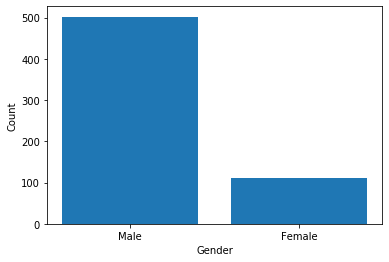

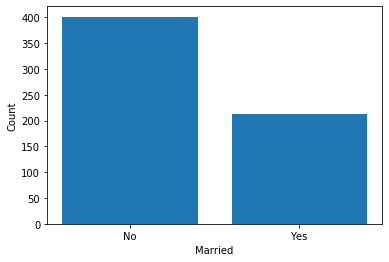

Text(0.5, 1.0, 'Married Status')

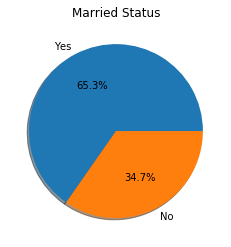

In [27]:
plt.bar(Loan_Train.Gender.unique(),Loan_Train.Gender.value_counts())
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()
plt.bar(Loan_Train.Married.unique(),Loan_Train.Married.value_counts())
plt.xlabel("Married")
plt.ylabel("Count")
plt.show()
plt.pie(Loan_Train.Married.value_counts(),shadow=True,autopct='%1.1f%%',radius=1,labels=["Yes","No"])
plt.title("Married Status",loc="center")

C:\Users\visha\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


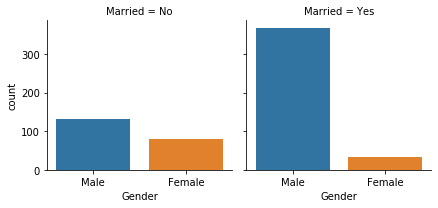

In [28]:
sns.catplot("Gender",col="Married",data=Loan_Train,kind="count",size=3)

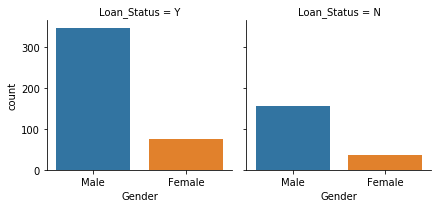

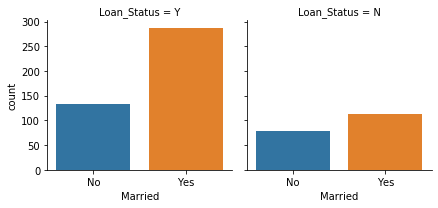

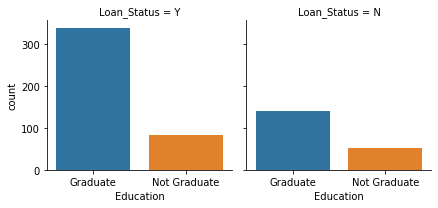

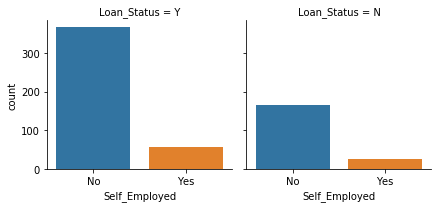

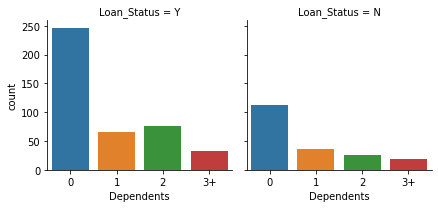

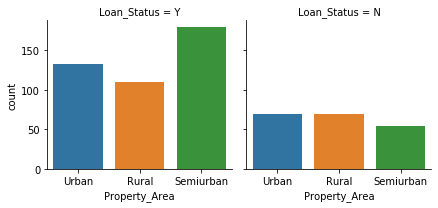

In [29]:
sns.catplot("Gender",col="Loan_Status",data=Loan_Train,kind="count",height=3)
sns.catplot("Married",col="Loan_Status",data=Loan_Train,kind="count",height=3)
sns.catplot("Education",col="Loan_Status",data=Loan_Train,kind="count",height=3)
sns.catplot("Self_Employed",col="Loan_Status",data=Loan_Train,kind="count",height=3)
sns.catplot("Dependents",col="Loan_Status",data=Loan_Train,kind="count",height=3)
sns.catplot("Property_Area",col="Loan_Status",data=Loan_Train,kind="count",height=3)

In [30]:
Loan_Train=pd.get_dummies(Loan_Train,drop_first=True)
Loan_Test=pd.get_dummies(Loan_Test,drop_first=True)
Loan_Train

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,146.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,71.0,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,40.0,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,253.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,187.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [31]:
x=Loan_Train.iloc[:,0:-1]
y=Loan_Train.Loan_Status_Y

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3,random_state=0)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [33]:
random_forest = RandomForestClassifier(n_estimators=40)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(X_test, Y_test) * 100, 2)

In [34]:
reg = LogisticRegression(solver='lbfgs',max_iter=1000)
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
acc_log = round(reg.score(X_train, Y_train) * 100, 2)
acc_log_test = round(reg.score(X_test, Y_test) * 100, 2)

In [35]:
decision_tree = DecisionTreeClassifier(max_depth=5) 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(X_test, Y_test) * 100, 2)

In [36]:
test=KNeighborsClassifier(n_neighbors=4)
test.fit(X_train,Y_train)
ypred=test.predict(X_test)
acc_Kneighbour=test.score(X_train, Y_train) * 100
acc_Kneighbour_test=test.score(X_test, Y_test) * 100

In [37]:
linear_svc = LinearSVC(random_state=1,max_iter=10000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc_test = round(linear_svc.score(X_test, Y_test) * 100, 2)

<BarContainer object of 5 artists>

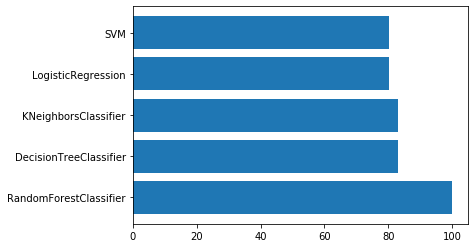

In [38]:
Model=["RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","LogisticRegression","SVM"]
Accuracy=[acc_random_forest,acc_decision_tree,acc_Kneighbour,acc_log,acc_linear_svc]
plt.barh(Model,Accuracy)

<BarContainer object of 5 artists>

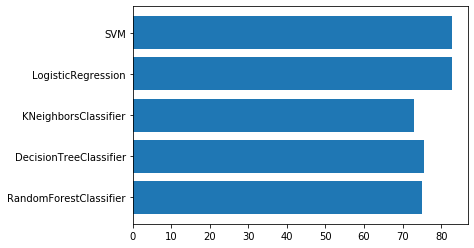

In [43]:
Model=["RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","LogisticRegression","SVM"]
Accuracy=[acc_random_forest_test,acc_decision_tree_test,acc_Kneighbour_test,acc_log_test,acc_linear_svc_test]
plt.barh(Model,Accuracy)

In [40]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_prediction)

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:01<00:00, 18.25it/s]


In [41]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.90,0.84,0.84,0.90,0.07
ExtraTreesClassifier,0.87,0.82,0.82,0.87,0.04
AdaBoostClassifier,0.84,0.80,0.80,0.84,0.14
XGBClassifier,0.89,0.80,0.80,0.88,0.16
LGBMClassifier,0.85,0.79,0.79,0.85,0.16
KNeighborsClassifier,0.89,0.79,0.79,0.88,0.03
SVC,0.89,0.78,0.78,0.88,0.04
BaggingClassifier,0.81,0.78,0.78,0.82,0.05
LabelPropagation,0.82,0.76,0.76,0.82,0.04
